In [31]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import geopandas as gpd

import discretize 
from simpeg import maps
from simpeg.electromagnetics import time_domain as tdem

In [91]:
# mtmillbed = gpd.read_file("../geoscience-bc/3-GEOLOGY/BedrockGeology_GBC-QUEST_LoganEtAl/Shapefiles_ClippedtoMountMilligan250K/QUEST_bedrocks_Clipped.shp")
# mtmillfaults = gpd.read_file("../geoscience-bc/3-GEOLOGY/BedrockGeology_GBC-QUEST_LoganEtAl/Shapefiles_ClippedtoMountMilligan250K/QUEST_faults_Clipped.shp")

mtmilldeposit = gpd.read_file("../geoscience-bc/3-GEOLOGY/BedrockGeology_Surface_2020-03/2020-03_DepositGeol_Surface.shp")
# mtmilldeposit = gpd.read_file("../geoscience-bc/3-GEOLOGY/BedrockGeology_Surface_2020-03/20K-Geology_LimitInterpretation.shp")
# mtmilldeposit = gpd.read_file("../geoscience-bc/3-GEOLOGY/SurficialGeology/1991_Kerr/SurficialGeol_Kerr91.shp")
# mtmilldeposit = gpd.read_file("../geoscience-bc/3-GEOLOGY/SurficialGeology/1991_Riker/SurficialGeology_Riker1991.shp")

mtmillfaults = gpd.read_file("../geoscience-bc/3-GEOLOGY/BedrockGeology_Surface_2020-03/2020-03_DepositGeol_Faults.shp")
mtmillpit = gpd.read_file("../geoscience-bc/3-GEOLOGY/BedrockGeology_Surface_2020-03/2020-03_PitOutline.shp")

In [98]:
mtmilldeposit["Area"] = mtmillbed.geometry.area

<Axes: >

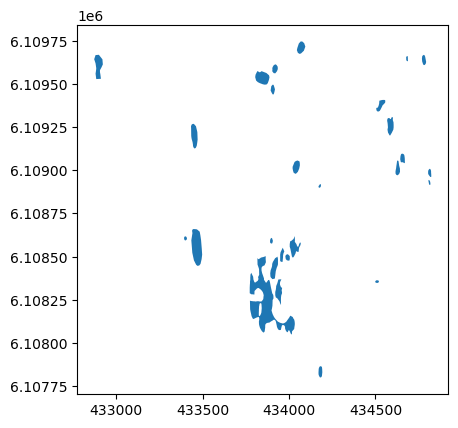

In [104]:
mtmilldeposit[(mtmilldeposit["Unit"] == "Monzonite Porphyry") & (mtmilldeposit["Area"] > 1e7)].plot()

<Axes: >

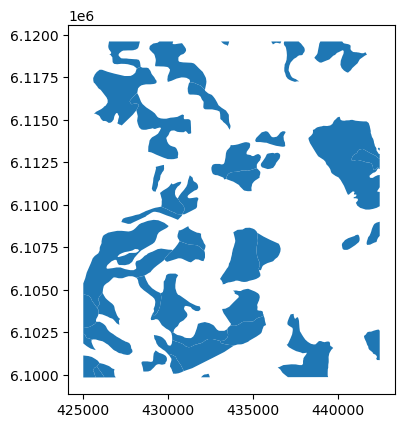

In [90]:
mtmilldeposit[mtmilldeposit["Unit_Maj"]=="Mb"].plot()

In [144]:
vtem_df = pd.read_csv("../geoscience-bc/5-GEOPHYSICS/OriginalData/EM_V-TEM_QUEST_GBCReport2008-4/Data/7042-MtMill.csv")
rx_times = pd.read_csv("./rx-times.csv")

<Axes: >

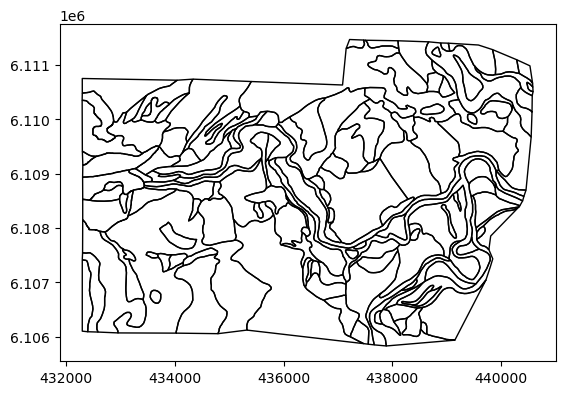

In [82]:
mtmilldeposit.plot(edgecolor='black', facecolor='None', linewidth=1)


In [151]:
lineids = np.unique(vtem_df["Line"])
data_cols = [c for c in vtem_df.columns if "Sf" in c][9:-4]

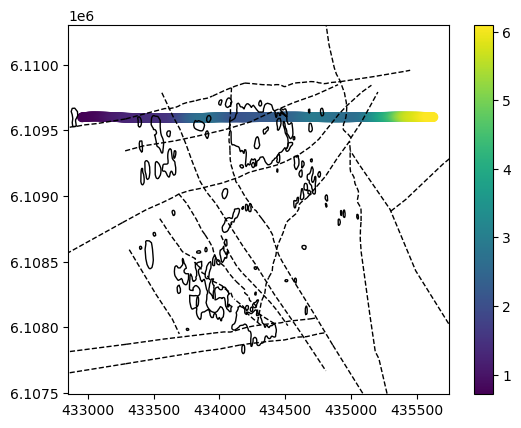

In [152]:
lid = 4
fig, ax = plt.subplots(1, 1)
# cb = plt.colorbar(
#     ax.scatter(vtem_df["x"], vtem_df["y"], c=vtem_df["Sf[9]"], norm=LogNorm()), ax=ax
# )
cb = plt.colorbar(
    ax.scatter(vtem_df[vtem_df["Line"]==lineids[lid]]["x"], vtem_df[vtem_df["Line"]==lineids[lid]]["y"], c=vtem_df[vtem_df["Line"]==lineids[lid]]["Sf[9]"]), ax=ax
)

# mtmillbed.plot(edgecolor='black', facecolor='None', linewidth=1, ax=ax)
mtmillfaults.plot(edgecolor='black', ls="--", facecolor='None', linewidth=1, ax=ax)
# mtmilldeposit.plot(edgecolor='black', facecolor='None', linewidth=1, ax=ax)
# mtmilldeposit[mtmilldeposit["Unit"] == "Monzonite Porphyry"].plot(edgecolor='black', facecolor='None', linewidth=1, ax=ax)
mtmilldeposit[
    (mtmilldeposit["Unit"] == "Monzonite Porphyry") 
    ].plot(edgecolor='black', facecolor='None', linewidth=1, ax=ax)


ax.set_xlim(vtem_df["x"].min()-100, vtem_df["x"].max()+100)
ax.set_ylim(vtem_df["y"].min()-100, vtem_df["y"].max()+100)

ax.set_aspect(1)

In [153]:
vtem_df["Sf[9]"]

0        3.736733
1        3.742083
2        3.746958
3        3.751430
4        3.755562
           ...   
14755    1.531526
14756    1.522538
14757    1.513128
14758    1.503223
14759    1.492769
Name: Sf[9], Length: 14760, dtype: float64

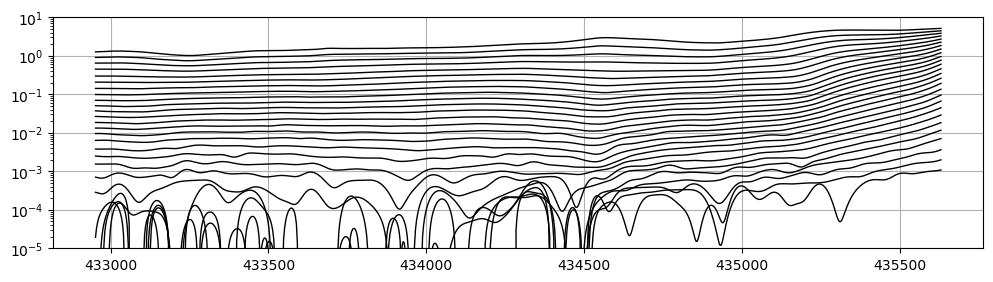

In [154]:
lid = 10

vtem_df_line = vtem_df[vtem_df["Line"]==lineids[lid]]

fig, ax = plt.subplots(1, 1, figsize = (12, 3))

ax.semilogy(vtem_df_line["x"], vtem_df_line[data_cols], "k", lw=1);
ax.set_ylim(1e-5, 1e1)
ax.grid()

In [157]:
vtem_df_line[data_cols]

,Sf[9],Sf[10],Sf[11],Sf[12],Sf[13],Sf[14],Sf[15],Sf[16],Sf[17],Sf[18],...,Sf[26],Sf[27],Sf[28],Sf[29],Sf[30],Sf[31],Sf[32],Sf[33],Sf[34],Sf[35]
9546,1.264232,0.906037,0.644014,0.449440,0.297417,0.206919,0.142074,0.098700,0.069833,0.050496,...,0.002484,0.001534,0.000704,0.000284,-0.000021,-0.000074,0.000019,-0.000143,-0.000056,-0.000070
9547,1.266160,0.907309,0.644449,0.449428,0.297190,0.206821,0.142099,0.098622,0.069760,0.050446,...,0.002472,0.001535,0.000695,0.000280,-0.000019,-0.000071,0.000032,-0.000125,-0.000054,-0.000068
9548,1.268240,0.908678,0.644962,0.449480,0.297000,0.206738,0.142128,0.098552,0.069683,0.050396,...,0.002461,0.001536,0.000686,0.000276,-0.000016,-0.000066,0.000044,-0.000107,-0.000055,-0.000066
9549,1.270499,0.910129,0.645546,0.449591,0.296856,0.206670,0.142156,0.098489,0.069602,0.050347,...,0.002451,0.001538,0.000677,0.000271,-0.000011,-0.000060,0.000056,-0.000089,-0.000057,-0.000064
9550,1.272955,0.911651,0.646190,0.449756,0.296762,0.206616,0.142176,0.098432,0.069519,0.050298,...,0.002441,0.001539,0.000670,0.000267,-0.000005,-0.000054,0.000067,-0.000071,-0.000060,-0.000063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10389,5.077711,4.354297,3.732341,3.137288,2.571435,2.125365,1.720686,1.378903,1.099475,0.874520,...,0.085615,0.059758,0.040471,0.026205,0.016692,0.010735,0.006554,0.003320,0.001845,0.001038
10390,5.094837,4.379437,3.762609,3.169495,2.605224,2.158015,1.751660,1.406804,1.123712,0.895135,...,0.087951,0.061379,0.041490,0.026852,0.017084,0.010948,0.006677,0.003388,0.001874,0.001046
10391,5.112465,4.405639,3.793547,3.202277,2.639715,2.191477,1.783392,1.435382,1.148571,0.916301,...,0.090339,0.063037,0.042548,0.027521,0.017491,0.011162,0.006804,0.003463,0.001907,0.001056
10392,5.130510,4.432766,3.824995,3.235529,2.674776,2.225633,1.815757,1.464517,1.173957,0.937942,...,0.092779,0.064730,0.043645,0.028213,0.017911,0.011381,0.006935,0.003546,0.001943,0.001067


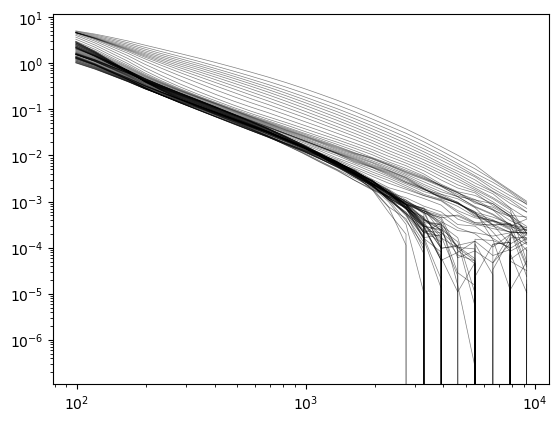

In [165]:
fig, ax = plt.subplots(1, 1)
ax.loglog(rx_times["time gate"], (vtem_df_line[data_cols][::10]).T, "k", lw=0.5, alpha=0.5);
ax.